In [4]:
!pip install xgboost


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# Kütüphaneler

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_squared_error , r2_score , confusion_matrix , accuracy_score , roc_auc_score , roc_curve , classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale , StandardScaler     # standardizasoyon işlemleri
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier


from warnings import filterwarnings
filterwarnings("ignore")     # önceki bölümlerde çalıştırdığımızda çıkan gereksiz uyarı mesajları çıkmasın diye

In [7]:
df = pd.read_csv("Veri ve Fotoğraflar\diabetes.csv")
df.head()


# Bağımlı değişkenimiz "Outcome". Yani burada kişi diyabet hastası mı değil mi bunu inceliyoruz. 1, hasta ; 0, hasta değil

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
y = df["Outcome"]

x = df.drop(["Outcome"] , axis=1)

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.30 , random_state=42)

# MODEL

In [9]:
xgb_model = XGBClassifier().fit(x_train , y_train)

In [10]:
?xgb_model

Type:        XGBClassifier
String form:
XGBClassifier(base_score=None, booster=None, callbacks=None,
           colsample_bylevel=None <...> ne, n_estimators=None, n_jobs=None,
           num_parallel_tree=None, random_state=None, ...)
File:        c:\python312\lib\site-packages\xgboost\sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost classification.
See :doc:`/python/sklearn_estimator` for more information.

Parameters
----------

    n_estimators : Optional[int]
        Number of boosting rounds.

    max_depth :  typing.Optional[int]

        Maximum tree depth for base learners.

    max_leaves : typing.Optional[int]

        Maximum number of leaves; 0 indicates no limit.

    max_bin : typing.Optional[int]

        If using histogram-based algorithm, maximum number of bins per feature

    grow_policy : typing.Optional[str]

        Tree growing policy.

        - depthwise: Favors splitting at nodes closest to the node,
        - lossguide: Favors split

# TAHMİN

In [11]:
y_pred = xgb_model.predict(x_test)

accuracy_score(y_test , y_pred)

0.7272727272727273

# MODEL TUNING (DOĞRULAMA)

In [17]:
xgb = XGBClassifier()

In [18]:
xgb_params = {"n_esitmators": [100,500,1000] , "subsample": [0.6 , 0.8 , 1] , "max_depth": [3,5,7] , "learning_rate": [0.1 , 0.001 , 0.01]}

In [19]:
xgb_cv_model = GridSearchCV(xgb , xgb_params , cv=10 , n_jobs=-1 , verbose=2).fit(x_train , y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


In [20]:
xgb_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 7, 'n_esitmators': 100, 'subsample': 0.6}

In [21]:
# FİNAL MODELİMİZ

xgb_tuned = XGBClassifier(learning_rate=0.01 , max_depth=7 , n_estimators=100 , subsample=0.6).fit(x_train , y_train)

In [22]:
y_pred = xgb_cv_model.predict(x_test)

accuracy_score(y_test , y_pred)

0.7489177489177489

# DEĞİŞKEN ÖNEM DÜZEYİ

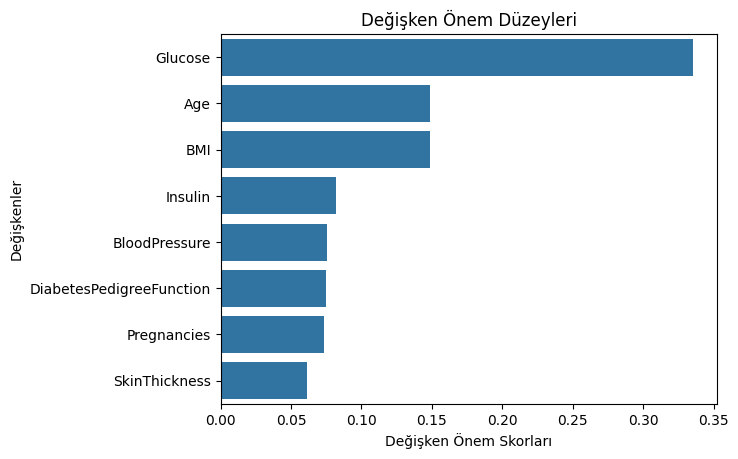

In [23]:
featue_imp = pd.Series(xgb_tuned.feature_importances_ , index=x_train.columns).sort_values(ascending=False)

sns.barplot(x=featue_imp , y=featue_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Değişken Önem Düzeyleri")
plt.show()